In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

import datetime
import os
import shutil

#matplotlib.rcParams['agg.path.chunksize'] = 1000


In [2]:
#output_path = "/mnt/ScratchHDD1/Max_Scratch/lbm_simulations"  # lokal HBRS
#output_path = "/home/max/Documents/lbm_simulations"  # lokal Bonn
output_path = "/home/mbille/Desktop/2D vs 3D"  # cluster_BONN

data1 = ""
#data2 = "/data_230406_150035_TtargetSearch_Re300.0_nsteps710140"

periodic_start=0.9

In [19]:
## LOAD DATA

drag_2d_GPD40 = np.loadtxt(output_path+"/drag_2d_GPD40_DpY10_BGK_T300_Re300_ibb1c2.txt")
lift_2d_GPD40 = np.loadtxt(output_path+"/lift_2d_GPD40_DpY10_BGK_T300_Re300_ibb1c2.txt")
drag_2d_GPD50 = np.loadtxt(output_path+"/drag_2d_GPD50_DpY10_BGK_T300_Re300_ibb1c2.txt")
lift_2d_GPD50 = np.loadtxt(output_path+"/lift_2d_GPD50_DpY10_BGK_T300_Re300_ibb1c2.txt")

drag_3d_GPD40 = np.loadtxt(output_path+"/drag_3d_GPD40_DpY10_DpZ3_BGK_T300_Re300_ibb1c2.txt")
lift_3d_GPD40 = np.loadtxt(output_path+"/lift_3d_GPD40_DpY10_DpZ3_BGK_T300_Re300_ibb1c2.txt")
drag_3d_GPD50 = np.loadtxt(output_path+"/drag_3d_GPD50_DpY10_DpZ1_BGK_T300_Re300_ibb1c2.txt")
lift_3d_GPD50 = np.loadtxt(output_path+"/lift_3d_GPD50_DpY10_DpZ1_BGK_T300_Re300_ibb1c2.txt")

drag_3d_GPD40_hwbb = np.loadtxt(output_path+"/drag_3d_GPD40_DpY10_DpZ3_BGK_T300_Re300_hwbbc2.txt")
lift_3d_GPD40_hwbb = np.loadtxt(output_path+"/lift_3d_GPD40_DpY10_DpZ3_BGK_T300_Re300_hwbbc2.txt")
drag_3d_GPD50_hwbb = np.loadtxt(output_path+"/drag_3d_GPD50_DpY10_DpZ1_BGK_T300_Re300_hwbbc2.txt")
lift_3d_GPD50_hwbb = np.loadtxt(output_path+"/lift_3d_GPD50_DpY10_DpZ1_BGK_T300_Re300_hwbbc2.txt")

In [17]:
# drag_1 = np.loadtxt(str(output_path+"/Re3900_F64_GPD24_KBC_drag_coefficient.txt"))
# drag_2 = np.loadtxt(str(output_path+"/Re3900_F32_GPD24_KBC_drag_coefficient.txt"))
# drag_3 = np.loadtxt(str(output_path+"/Re3900_F32c_GPD24_KBC_drag_coefficient.txt"))
# #drag_diff = drag_1-drag_2  # only applicable for same resolution => same step-number
#
# print("drag_1.mean: ", drag_1[int(drag_1.shape[0]*periodic_start-1):,2].mean())
# #print("drag_2.mean: ", drag_2[int(drag_2.shape[0]*periodic_start-1):,2].mean())
# #print("drag_mean_diff", drag_1[int(drag_1.shape[0]*periodic_start-1):,2].mean() - drag_2[int(drag_2.shape[0]*0.8-1):,2].mean())
# print("from t >", round(drag_1[int(drag_1.shape[0]*periodic_start-1),1],2))



drag_1.mean:  1.0171599403824934
from t > 100.0


1.0163323719255928


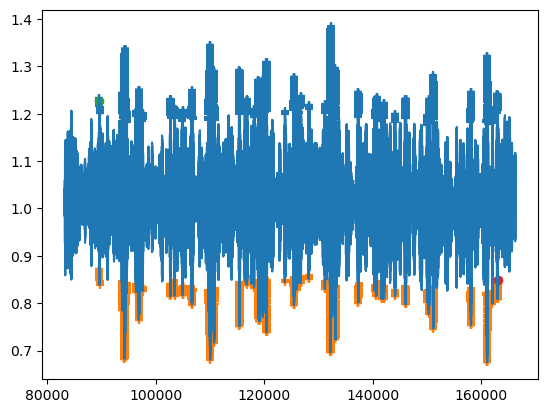

In [5]:
# # FIND PEAKS and calc mean drag:
#
# drag_1_stepsLU = drag_1[int(drag_1.shape[0]*periodic_start-1):,0]
# drag_1_values = drag_1[int(drag_1.shape[0]*periodic_start-1):,2]
#
# peaks_max = find_peaks(drag_1_values, prominence=((drag_1_values.max()-drag_1_values.min())/2))
# peak_max_y = drag_1_values[peaks_max[0]]
# peak_max_x = drag_1_stepsLU[peaks_max[0]]
#
# peaks_min = find_peaks(-drag_1_values, prominence=((drag_1_values.max()-drag_1_values.min())/2))
# peak_min_y = drag_1_values[peaks_min[0]]
# peak_min_x = drag_1_stepsLU[peaks_min[0]]
#
# if peaks_min[0].shape[0] - peaks_max[0].shape[0] > 0:
#     peak_number = peaks_max[0].shape[0]
# else:
#     peak_number = peaks_min[0].shape[0]
#
# if peaks_min[0][0] < peaks_max[0][0]:
#     first_peak = peaks_min[0][0]
#     last_peak = peaks_max[0][peak_number-1]
# else:
#     first_peak = peaks_max[0][0]
#     last_peak = peaks_min[0][peak_number-1]
#
# plt.plot(drag_1_stepsLU, drag_1_values)
# plt.scatter(peak_max_x[:peak_number],peak_max_y[:peak_number],marker="+")
# plt.scatter(peak_min_x[:peak_number],peak_min_y[:peak_number],marker="+")
# plt.scatter(drag_1_stepsLU[first_peak],drag_1_values[first_peak],marker="o")
# plt.scatter(drag_1_stepsLU[last_peak],drag_1_values[last_peak],marker="o")
#
# drag_mean = drag_1_values[first_peak:last_peak].mean()
# print(drag_mean)

In [6]:
# drag_1[-1,1]
# len(drag_1[:,1])

166277

In [7]:
### IDEE
# - FFT Funktion, die für eine Datenreihe das Spektrum als [freqs, Xamp] zurückgibt
# - drag, drag_reduced und drag_rolling_mean mal im Sprketrum gegeneinander plotten.

In [8]:
def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
# die ersten n-1 Werte "fehlen"

In [18]:
# n = 100
# drag1_rolling_mean = moving_average(drag_1[:,2], n)
# drag1_rolling_mean_time = drag_1[n-1:,1]
#
# drag2_rolling_mean = moving_average(drag_2[:,2], n)
# drag2_rolling_mean_time = drag_2[n-1:,1]
#
# drag3_rolling_mean = moving_average(drag_3[:,2], n)
# drag3_rolling_mean_time = drag_3[n-1:,1]

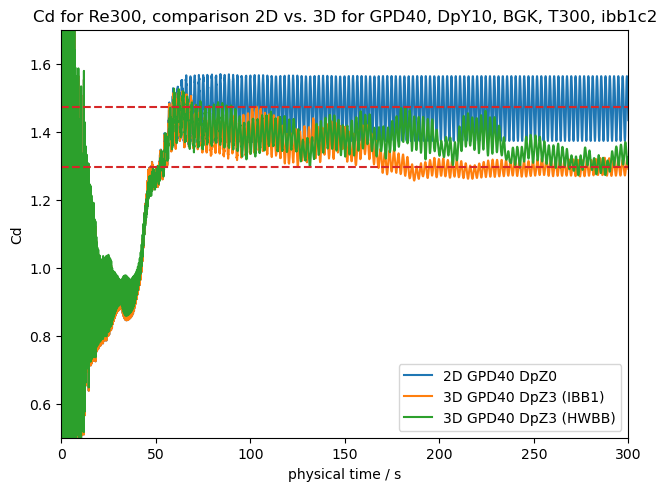

In [24]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag_2d_GPD40[:,1], drag_2d_GPD40[:,2], drag_3d_GPD40[:,1],drag_3d_GPD40[:,2], drag_3d_GPD40_hwbb[:,1], drag_3d_GPD40_hwbb[:,2])
ax.set_ylim([0.5,1.7])
ax.set_xlim([0,300])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Cd")
plt.legend(labels=["2D GPD40 DpZ0", "3D GPD40 DpZ3 (IBB1)", "3D GPD40 DpZ3 (HWBB)"])
plt.title("Cd for Re300, comparison 2D vs. 3D for GPD40, DpY10, BGK, T300, ibb1c2")

means = [drag_3d_GPD40[int(drag_3d_GPD40.shape[0]*periodic_start-1):,2].mean(),drag_2d_GPD40[int(drag_2d_GPD40.shape[0]*periodic_start-1):,2].mean()]
ax.hlines(means,xmin=0,xmax=300, colors='tab:red',linestyles="dashed")

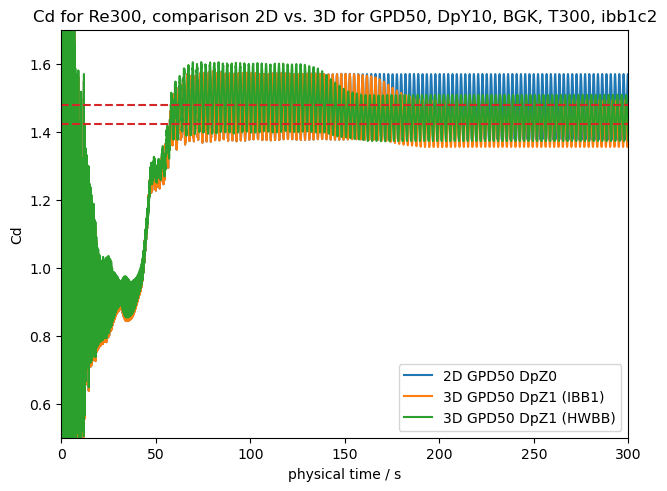

In [25]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag_2d_GPD50[:,1], drag_2d_GPD50[:,2], drag_3d_GPD50[:,1],drag_3d_GPD50[:,2], drag_3d_GPD50_hwbb[:,1], drag_3d_GPD50_hwbb[:,2])
ax.set_ylim([0.5,1.7])
ax.set_xlim([0,300])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Cd")
plt.legend(labels=["2D GPD50 DpZ0", "3D GPD50 DpZ1 (IBB1)", "3D GPD50 DpZ1 (HWBB)"])
plt.title("Cd for Re300, comparison 2D vs. 3D for GPD50, DpY10, BGK, T300, ibb1c2")

means = [drag_3d_GPD50[int(drag_3d_GPD50.shape[0]*periodic_start-1):,2].mean(),drag_2d_GPD50[int(drag_2d_GPD50.shape[0]*periodic_start-1):,2].mean()]
ax.hlines(means,xmin=0,xmax=300, colors='tab:red',linestyles="dashed")

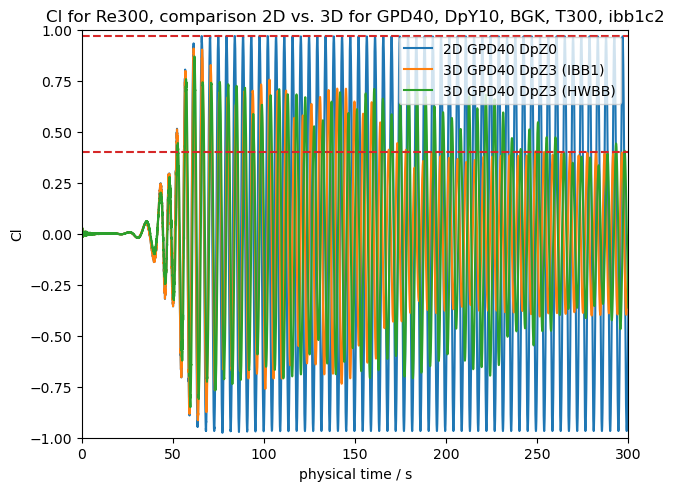

In [23]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift_2d_GPD40[:,1], lift_2d_GPD40[:,2], lift_3d_GPD40[:,1],lift_3d_GPD40[:,2], lift_3d_GPD40_hwbb[:,1], lift_3d_GPD40_hwbb[:,2])
ax.set_ylim([-1,1.0])
ax.set_xlim([0,300])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Cl")
plt.legend(labels=["2D GPD40 DpZ0", "3D GPD40 DpZ3 (IBB1)", "3D GPD40 DpZ3 (HWBB)"])
plt.title("Cl for Re300, comparison 2D vs. 3D for GPD40, DpY10, BGK, T300, ibb1c2")

maxs = [lift_3d_GPD40[int(lift_3d_GPD40.shape[0]*periodic_start-1):,2].max(),lift_2d_GPD40[int(lift_2d_GPD40.shape[0]*periodic_start-1):,2].max()]
ax.hlines(maxs,xmin=0,xmax=300, colors='tab:red',linestyles="dashed")

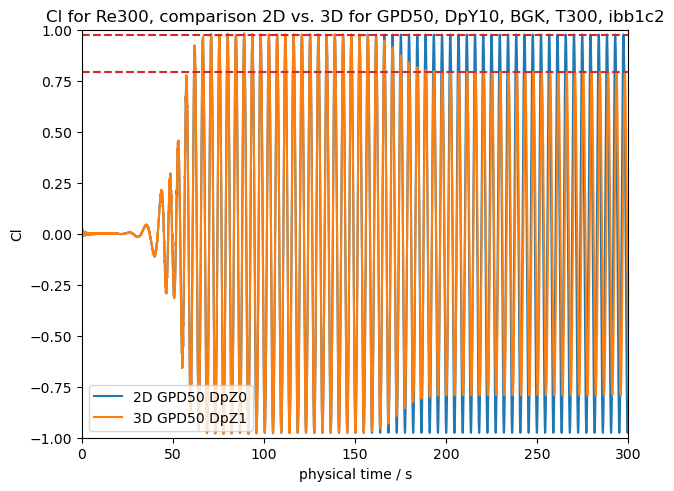

In [18]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift_2d_GPD50[:,1], lift_2d_GPD50[:,2], lift_3d_GPD50[:,1],lift_3d_GPD50[:,2])
ax.set_ylim([-1,1.0])
ax.set_xlim([0,300])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Cl")
plt.legend(labels=["2D GPD50 DpZ0", "3D GPD50 DpZ1"])
plt.title("Cl for Re300, comparison 2D vs. 3D for GPD50, DpY10, BGK, T300, ibb1c2")

maxs = [lift_3d_GPD50[int(lift_3d_GPD50.shape[0]*periodic_start-1):,2].max(),lift_2d_GPD50[int(lift_2d_GPD50.shape[0]*periodic_start-1):,2].max()]
ax.hlines(maxs,xmin=0,xmax=300, colors='tab:red',linestyles="dashed")

time_interval: 83.1385
steps_interval: 83


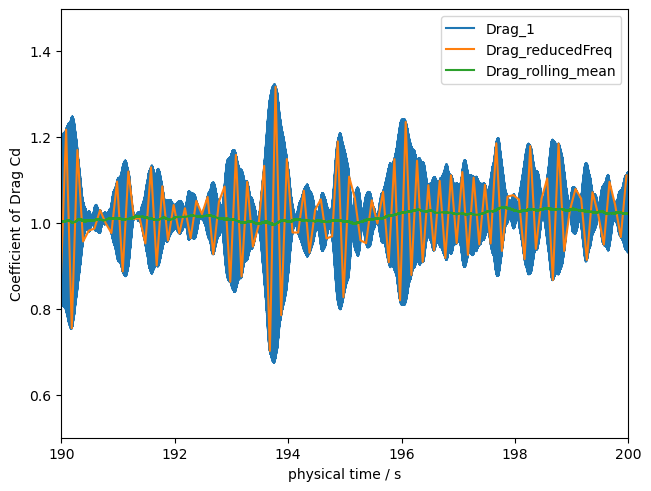

In [10]:
# PLOT DRAG

points = 2000
print("time_interval:", len(drag_1[:,1])/points)
interval = int(drag_1[-1,0]/points)
print("steps_interval:", interval)

drag_small = []

for i in range(drag_1.shape[0]):
    if i % interval == 0:
        drag_small.append(drag_1[i])
drag_small = np.array(drag_small)
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag_1[:,1],drag_1[:,2], drag_small[:,1], drag_small[:,2], drag1_rolling_mean_time, drag1_rolling_mean)
#ax.plot(drag_2[:,1],drag_2[:,2])
#ax.plot(drag_1[:,1],drag_diff[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
#ax.set_ylim([1,3])
ax.set_ylim([0.5,1.496])
#print(drag_diff[:,2].mean())
ax.set_xlim([190,200])
plt.legend(labels=["Drag_1", "Drag_reducedFreq", "Drag_rolling_mean"])
#plt.title("")

Frequency Peak: 3.949965416793129 +- 0.008333260372981285 Hz
T: 120.00105063826808
df: 0.008333260372981285
min.f: 0.008333260372981285
max.f: 415.692193815612


(0.0, 1.0)

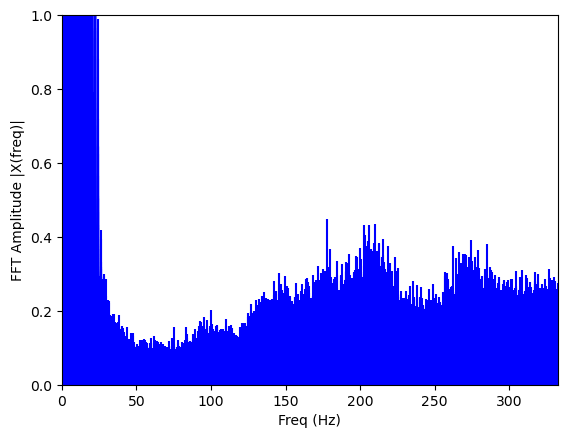

In [11]:

### prototyped fft for frequency detection and calculation of strouhal-number
# ! Drag_frequency is 2* Strouhal-Freq. Lift-freq. is Strouhal-Freq.
drag_converged = drag_1[int(0.4*drag_1.shape[0]):,:]

X = np.fft.fft(drag_converged[:, 2])  # fft result (amplitudes)
N = len(X)  # number of freqs
n = np.arange(N)  # freq index
T = N*(drag_converged[2,1]-drag_converged[1,1]) # total time measured (T_PU)
freq = n / T  # frequencies (x-axis of spectrum)

plt.figure
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")  # plot spectrum |X|(f)
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")
#plt.xlim(0,50)
# print("max. Amplitude np.abx(X).max():", np.abs(X).max())   # for debugging
plt.ylim(0, np.abs(X[10:int(X.shape[0] * 0.5)]).max())  # ylim, where highes peak is on left half of full spectrum

freq_res = freq[1] - freq[0]  # frequency-resolution
X_abs = np.abs(X[10:int(X.shape[0] * 0.4)])  # get |X| Amplitude for left half of full spectrum
freq_peak = freq[np.argmax(X_abs)]  # find frequency with highest amplitude
print("Frequency Peak:", freq_peak, "+-", freq_res, "Hz")
# f = Strouhal for St=f*D/U and D=U=1 in PU

print("T:", T)
print("df:", freq_res)
print("min.f:", 1/T)
print("max.f:", 1/(drag_converged[2,1]-drag_converged[1,1])*0.5)
plt.xlim(0,1/(drag_converged[2,1]-drag_converged[1,1])*0.4)
plt.ylim(0,1)

In [19]:
lift_1 = np.loadtxt(str(output_path+data1+"/lift_coefficient.txt"))
#lift_2 = np.loadtxt(str(output_path+data2+"/lift_coefficient.txt"))
#lift_diff = lift_1-lift_2

print("Cl1_peaks: \nmin", lift_1[:,2].min(),"\nmax", lift_1[:,2].max())
#print("\nCl2_peaks: \nmin", lift_2[:,2].min(),"\nmax", lift_2[:,2].max())

Cl1_peaks: 
min -2.1996998097625324 
max 2.217708491654612


(-3.0, 3.0)

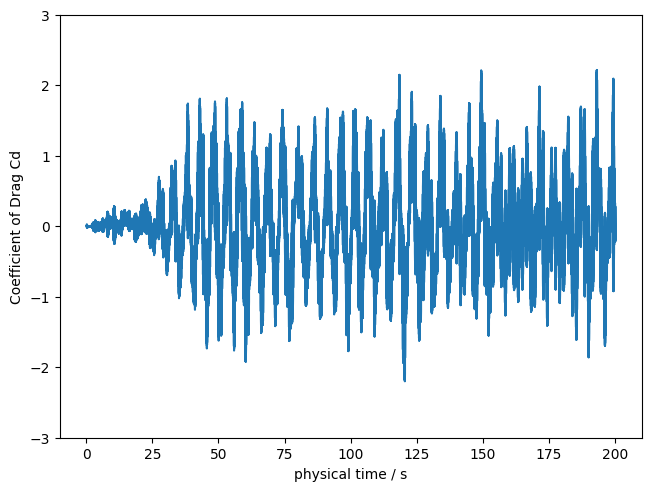

In [20]:
# PLOT LIFT

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift_1[:,1],lift_1[:,2])
#ax.plot(lift_2[:,1],lift_2[:,2])
#ax.plot(lift_1[:,1],lift_diff[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
ax.set_ylim([-3,3])
#ax.set_ylim([-0.01,0.01])
#ax.set_xlim([80,140])
#plt.legend(labels=["-", "-"])

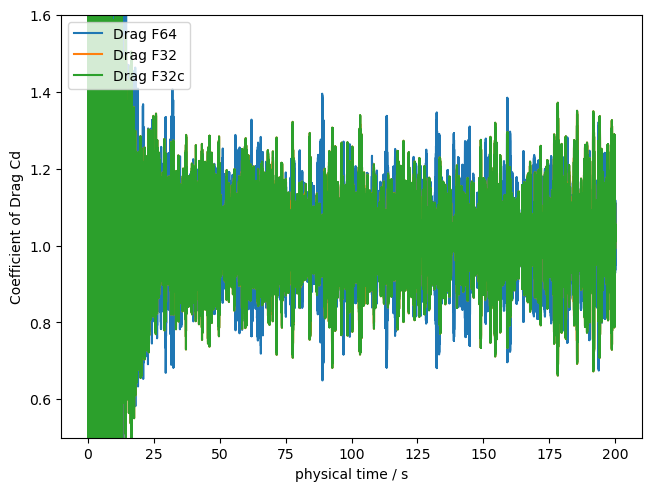

In [30]:
fig, ax = plt.subplots(layout="constrained")
ax.plot(drag_1[:,1],drag_1[:,2], color="tab:blue", label="Drag F64")
ax.plot(drag_2[:,1],drag_2[:,2], color="tab:orange", label="Drag F32")
ax.plot(drag_3[:,1],drag_3[:,2], color="tab:green", label="Drag F32c")
#ax.plot(drag_2[:,1],drag_2[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
ax.set_ylim([0.5,1.6])

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

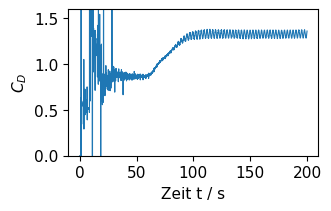

In [11]:
# Re200, GPD50, DPY50
drag = np.loadtxt("/home/mbille/Desktop/drag_coefficient.txt")
lift = np.loadtxt("/home/mbille/Desktop/lift_coefficient.txt")

matplotlib.rcParams.update({'font.size': 11})
matplotlib.rcParams.update({'lines.linewidth': 0.8})
matplotlib.rcParams.update({'figure.figsize': [3.2,2]})

fig, ax = plt.subplots(constrained_layout=True, )
ax.plot(drag[:,1],drag[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{D}$")
ax.set_ylim([0,1.6])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()

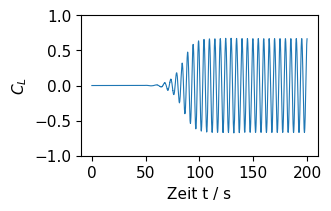

In [13]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift[:,1],lift[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{L}$")
ax.set_ylim([-1,1])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()

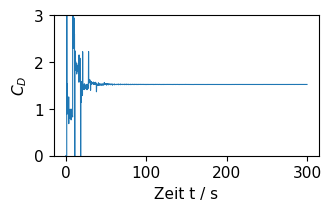

In [15]:
# Re40, GPD50, DPY50
drag = np.loadtxt("/home/mbille/Desktop/drag_coefficient_40.txt")
#lift = np.loadtxt("/home/mbille/Desktop/lift_coefficient.txt")

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag[:,1],drag[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{D}$")
ax.set_ylim([0,3])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()